In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
# Loading a sample image with OpenCV

img = cv2.imread("E:\Data\Image_Classifier_Project\Dataset\kobe.jpg")
img.shape

<>:3: SyntaxWarning: invalid escape sequence '\D'
<>:3: SyntaxWarning: invalid escape sequence '\D'
C:\Users\iT LOGIX\AppData\Local\Temp\ipykernel_14764\2533577255.py:3: SyntaxWarning: invalid escape sequence '\D'
  img = cv2.imread("E:\Data\Image_Classifier_Project\Dataset\kobe.jpg")


(500, 500, 3)

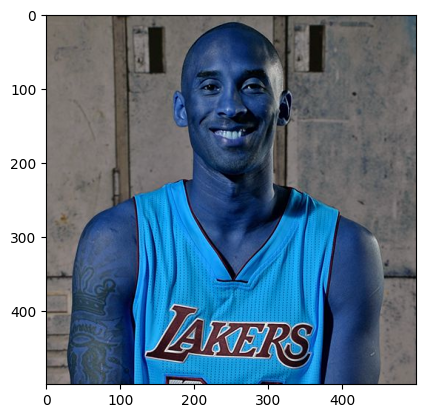

In [3]:
# Showing the sample image with Matplotlib

plt.imshow(img)

In [4]:
# Turning the sample image gray with OpenCV

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(500, 500)

In [5]:
gray

array([[108, 109, 109, ...,  80,  80,  81],
       [108, 109, 109, ...,  83,  84,  84],
       [108, 109, 109, ...,  88,  88,  88],
       ...,
       [121, 121, 120, ..., 115, 116, 116],
       [122, 121, 121, ..., 115, 115, 116],
       [121, 121, 121, ..., 115, 115, 115]], dtype=uint8)

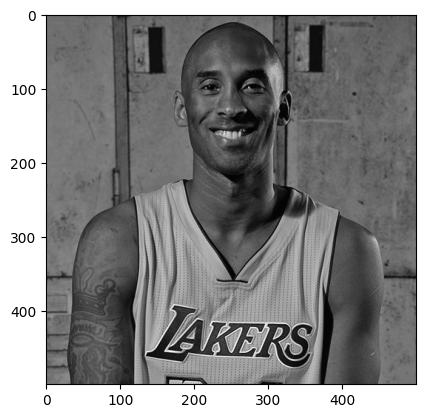

In [6]:
# Showing the gray sample image

plt.imshow(gray, cmap='gray')

In [7]:
# Loading HAAR cascades from my computer for the detection of eye and face

face_cascade = cv2.CascadeClassifier("E:/Data/Image_Classifier_Project/haarcascades/haarcascade_frontalface_default.xml")
eye_cascade = cv2.CascadeClassifier("E:/Data/Image_Classifier_Project/haarcascades/haarcascade_eye.xml")

faces = face_cascade.detectMultiScale(gray, 1.2, 6)
faces

array([[178,  39, 146, 146]])

In [8]:
(x,y,w,h) = faces[0]
x,y,w,h

(178, 39, 146, 146)

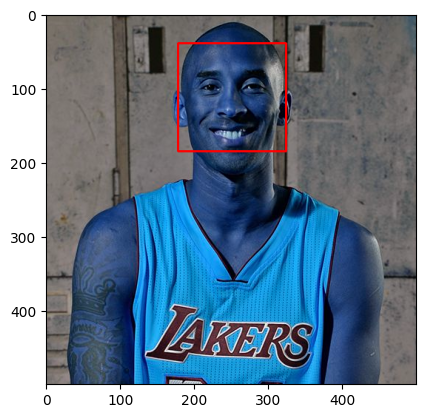

In [9]:
# Detecting the face with a red rectangle

face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2) # This detects the face. It's general syntax is: variable = cv2.rectangle(image variable, (Top-Left Corner), (Bottom-Right Corner), (Red,Green,Blue), Thickness)
plt.imshow(face_img) # This shows the image

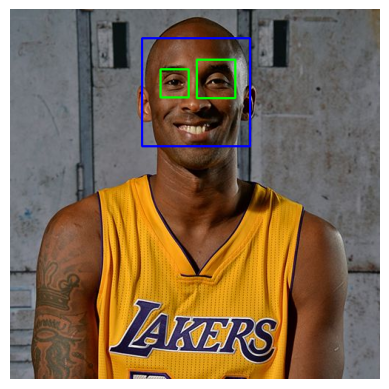

In [10]:
# Detect the eyes with green rectangles

cv2.destroyAllWindows() # Closes all the windows that have been opened by the cv2.imshow() function

# Detect faces
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2) # Draws a blue rectangle around the face (Blue because OpenCV takes in BGR format while Matplotlib takes in RGB format)
    
    # Define region of interest for face (roi stands for region of interest)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]

    # Detect eyes within the face region
    eyes = eye_cascade.detectMultiScale(roi_gray)

    # Draw green rectangles around the eyes
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2) # This detects the the eyes with green rectangles
        
# Convert BGR image to RGB for displaying with matplotlib
face_img_rgb = cv2.cvtColor(face_img, cv2.COLOR_BGR2RGB)

# Display the result using matplotlib
plt.figure()
plt.imshow(face_img_rgb)  # Display in RGB format
plt.axis('off')  # Optional: turn off axis lines
plt.show()

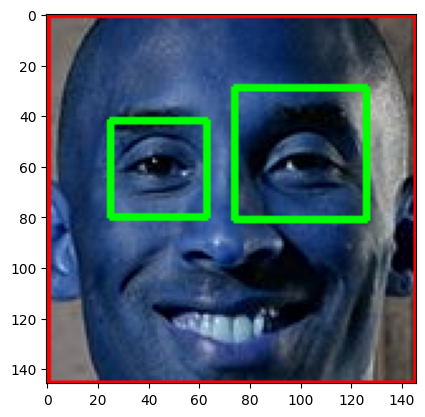

In [11]:
%matplotlib inline
plt.imshow(roi_color, cmap='gray')

In [12]:
def get_cropped_image_if_2_eyes(image_path):
    # Load the image
    img = cv2.imread(image_path)
    
    # Convert to grayscale for detection
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    # Detect faces
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    
    for (x, y, w, h) in faces:
        # Region of interest for face (in grayscale and color)
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        
        # Detect eyes within the face region
        eyes = eye_cascade.detectMultiScale(roi_gray)
        
        # If two or more eyes are detected, return the cropped face
        if len(eyes) >= 2:
            return roi_color
    
    # If no face with two eyes is found, return None
    return None

<>:3: SyntaxWarning: invalid escape sequence '\D'
<>:3: SyntaxWarning: invalid escape sequence '\D'
C:\Users\iT LOGIX\AppData\Local\Temp\ipykernel_14764\1700976700.py:3: SyntaxWarning: invalid escape sequence '\D'
  original_image = cv2.imread("E:\Data\Image_Classifier_Project\Dataset\kobe.jpg")


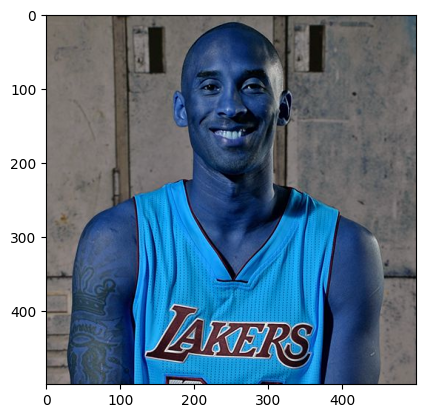

In [13]:
# Load the original image from computer

original_image = cv2.imread("E:\Data\Image_Classifier_Project\Dataset\kobe.jpg")
plt.imshow(original_image)

<>:3: SyntaxWarning: invalid escape sequence '\D'
<>:3: SyntaxWarning: invalid escape sequence '\D'
C:\Users\iT LOGIX\AppData\Local\Temp\ipykernel_14764\1680341598.py:3: SyntaxWarning: invalid escape sequence '\D'
  cropped_image = get_cropped_image_if_2_eyes("E:\Data\Image_Classifier_Project\Dataset\kobe.jpg")


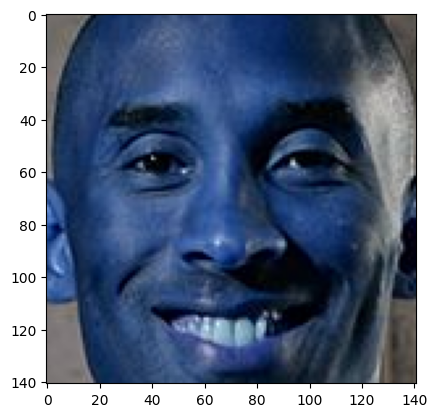

In [14]:
# Apply the get_cropped_image_if_2_eyes code designed for extracting the face roi in the original image

cropped_image = get_cropped_image_if_2_eyes("E:\Data\Image_Classifier_Project\Dataset\kobe.jpg")
plt.imshow(cropped_image)

<>:3: SyntaxWarning: invalid escape sequence '\D'
<>:3: SyntaxWarning: invalid escape sequence '\D'
C:\Users\iT LOGIX\AppData\Local\Temp\ipykernel_14764\140499658.py:3: SyntaxWarning: invalid escape sequence '\D'
  org_image_obstructed = cv2.imread("E:\Data\Image_Classifier_Project\Dataset\kobe12614422506kobe.jpg")


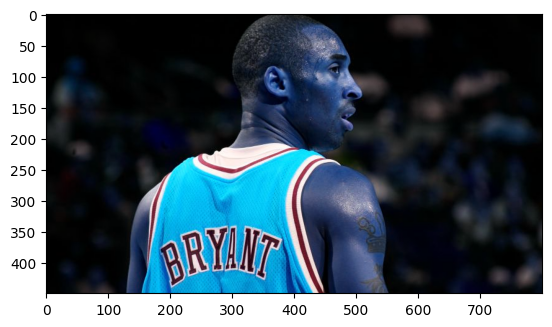

In [15]:
# Let's load another image of Kobe Bryant which is obstructed and the face or the eyes are not clearly visible

org_image_obstructed = cv2.imread("E:\Data\Image_Classifier_Project\Dataset\kobe12614422506kobe.jpg")
plt.imshow(org_image_obstructed)

In [16]:
# When I run this following block of code, nothing returns. Why? Because the face and the eyes are not visible. It's a side profile image.

cropped_image_no_2_eyes = get_cropped_image_if_2_eyes("E:/Data/Image_Classifier_Project/Dataset/kobe12614422506kobe.jpg")
cropped_image_no_2_eyes

In [17]:
path_to_data = r".E:/Data/Image_Classifier_Project/Dataset/"
path_to_cr_data = r".E:/Data/Image_Classifier_Project/Dataset/cropped/"

In [18]:
import os

# Set the path correctly, without the leading '.' and using raw string format
path_to_data = r"E:/Data/Image_Classifier_Project/Dataset/"

img_dirs = []
try:
    # Iterate through the directory entries
    for entry in os.scandir(path_to_data):
        if entry.is_dir():  # Check if the entry is a directory
            img_dirs.append(entry.path)  # Append directory path to the list
except FileNotFoundError:
    print(f"The directory {path_to_data} does not exist.")
except PermissionError:
    print(f"Permission denied for accessing {path_to_data}.")
except OSError as e:
    print(f"OSError: {e}")

# Display the collected directories
print("Image directories found:", img_dirs)



Image directories found: ['E:/Data/Image_Classifier_Project/Dataset/jerry_seinfeld', 'E:/Data/Image_Classifier_Project/Dataset/kobe_bryant', 'E:/Data/Image_Classifier_Project/Dataset/muhammad_ali', 'E:/Data/Image_Classifier_Project/Dataset/nas', 'E:/Data/Image_Classifier_Project/Dataset/steve_jobs']


In [19]:
img_dirs

['E:/Data/Image_Classifier_Project/Dataset/jerry_seinfeld',
 'E:/Data/Image_Classifier_Project/Dataset/kobe_bryant',
 'E:/Data/Image_Classifier_Project/Dataset/muhammad_ali',
 'E:/Data/Image_Classifier_Project/Dataset/nas',
 'E:/Data/Image_Classifier_Project/Dataset/steve_jobs']

In [20]:
import os
import shutil

path_to_cr_data = "E:\Data\Image_Classifier_Project\Dataset\cropped"

os.mkdir(path_to_cr_data)  # Creates a new empty directory

<>:4: SyntaxWarning: invalid escape sequence '\D'
<>:4: SyntaxWarning: invalid escape sequence '\D'
C:\Users\iT LOGIX\AppData\Local\Temp\ipykernel_14764\1359834350.py:4: SyntaxWarning: invalid escape sequence '\D'
  path_to_cr_data = "E:\Data\Image_Classifier_Project\Dataset\cropped"


In [21]:
cropped_image_dirs = []
great_file_names_dict = {}

for img_dir in img_dirs:
    count = 1
    great_name = img_dir.split('/')[-1]
    print(great_name)
    
    great_file_names_dict[great_name] = []
    
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cr_data + great_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)
                
            cropped_file_name = great_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name 
            
            cv2.imwrite(cropped_file_path, roi_color)
            great_file_names_dict[great_name].append(cropped_file_path)
            count += 1    

jerry_seinfeld
Generating cropped images in folder:  E:\Data\Image_Classifier_Project\Dataset\croppedjerry_seinfeld
kobe_bryant
Generating cropped images in folder:  E:\Data\Image_Classifier_Project\Dataset\croppedkobe_bryant
muhammad_ali
Generating cropped images in folder:  E:\Data\Image_Classifier_Project\Dataset\croppedmuhammad_ali
nas
Generating cropped images in folder:  E:\Data\Image_Classifier_Project\Dataset\croppednas
steve_jobs
Generating cropped images in folder:  E:\Data\Image_Classifier_Project\Dataset\croppedsteve_jobs


In [22]:
great_file_names_dict = {}

# Iterate over each directory in cropped_image_dirs
for img_dir in cropped_image_dirs:
    great_name = img_dir.split('/')[-1]  # Extract the names of the great people from the directory path
    file_list = []
    
    # Scan the directory and add file paths to the list
    for entry in os.scandir(img_dir):
        if entry.is_file():  # Ensure the entry is a file and not a sub-directory
            file_list.append(entry.path)
    
    # Map the name to the list of file paths
    great_file_names_dict[great_name] = file_list

# Resulting dictionary of celebrity names and their corresponding image files
great_file_names_dict

{'E:\\Data\\Image_Classifier_Project\\Dataset\\croppedjerry_seinfeld': ['E:\\Data\\Image_Classifier_Project\\Dataset\\croppedjerry_seinfeld\\jerry_seinfeld1.png',
  'E:\\Data\\Image_Classifier_Project\\Dataset\\croppedjerry_seinfeld\\jerry_seinfeld10.png',
  'E:\\Data\\Image_Classifier_Project\\Dataset\\croppedjerry_seinfeld\\jerry_seinfeld11.png',
  'E:\\Data\\Image_Classifier_Project\\Dataset\\croppedjerry_seinfeld\\jerry_seinfeld12.png',
  'E:\\Data\\Image_Classifier_Project\\Dataset\\croppedjerry_seinfeld\\jerry_seinfeld13.png',
  'E:\\Data\\Image_Classifier_Project\\Dataset\\croppedjerry_seinfeld\\jerry_seinfeld2.png',
  'E:\\Data\\Image_Classifier_Project\\Dataset\\croppedjerry_seinfeld\\jerry_seinfeld3.png',
  'E:\\Data\\Image_Classifier_Project\\Dataset\\croppedjerry_seinfeld\\jerry_seinfeld4.png',
  'E:\\Data\\Image_Classifier_Project\\Dataset\\croppedjerry_seinfeld\\jerry_seinfeld5.png',
  'E:\\Data\\Image_Classifier_Project\\Dataset\\croppedjerry_seinfeld\\jerry_seinfeld6.pn

In [23]:
class_dict = {}
count = 0

# Iterate over each great name and assign it a unique numeric ID
for great_name in great_file_names_dict.keys():
    class_dict[great_name] = count
    count += 1  # Increment the count for the next great

# The resulting dictionary of great names and their class IDs
class_dict

{'E:\\Data\\Image_Classifier_Project\\Dataset\\croppedjerry_seinfeld': 0,
 'E:\\Data\\Image_Classifier_Project\\Dataset\\croppedkobe_bryant': 1,
 'E:\\Data\\Image_Classifier_Project\\Dataset\\croppedmuhammad_ali': 2,
 'E:\\Data\\Image_Classifier_Project\\Dataset\\croppednas': 3,
 'E:\\Data\\Image_Classifier_Project\\Dataset\\croppedsteve_jobs': 4}

# Importing Wavelet and defining w2d

In [24]:
import cv2
import numpy as np
import pywt

def w2d(img, mode='haar', level=1):
    """
    Convert image to grayscale and apply wavelet transform.
    
    Parameters:
        img (ndarray): The input image in RGB or grayscale.
        mode (str): The type of wavelet to use (e.g., 'haar', 'db1', etc.).
        level (int): The level of wavelet decomposition.
    
    Returns:
        ndarray: The wavelet-transformed image (grayscale).
    """
    # Convert to grayscale
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    # Normalize the image
    img_gray = np.float32(img_gray) / 255.0

    # Apply wavelet transform
    coeffs = pywt.wavedec2(img_gray, mode, level=level)
    
    # Zero out the approximation coefficients (only keep details)
    coeffs_H = list(coeffs)
    coeffs_H[0] *= 0

    # Reconstruct the image from the wavelet coefficients
    img_har = pywt.waverec2(coeffs_H, mode)
    
    # Scale the image back to uint8
    img_har = np.uint8(255 * img_har)
    
    return img_har

# Applying Wavelet Transform

In [25]:
X, y = [], []

# Iterate over each great's name and their corresponding training files
for great_name, training_files in great_file_names_dict.items():
    for training_image in training_files:
        # Read the image
        img = cv2.imread(training_image)
        
        # Resize the raw image to 32x32 pixels
        scalled_raw_img = cv2.resize(img, (32, 32))
        
        # Apply 2D wavelet transformation (assuming w2d is defined)
        img_har = w2d(img, 'db1', 5)
        
        # Resize the wavelet transformed image to 32x32 pixels
        scalled_img_har = cv2.resize(img_har, (32, 32))
        
        # Combine raw and wavelet-transformed features
        combined_img = np.vstack((
            scalled_raw_img.reshape(32 * 32 * 3, 1),   # Flatten RGB image
            scalled_img_har.reshape(32 * 32, 1)        # Flatten wavelet-transformed image
        ))
        
        # Append the combined image to the feature list
        X.append(combined_img)
        
        # Append the corresponding label to the label list
        y.append(class_dict[great_name])

# At this point, X contains the combined feature vectors and y contains the class labels

In [26]:
len(X[0])

4096

In [27]:
32*32*3 + 32*32

4096

In [28]:
X[0]

array([[215],
       [101],
       [  1],
       ...,
       [185],
       [174],
       [139]], dtype=uint8)

In [29]:
y[0]

0

In [30]:
X = np.array(X).reshape(len(X),4096).astype(float)
X.shape

(43, 4096)

# Training the model

In [31]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline

# Flatten the combined image vectors in X
X = [x.flatten() for x in X]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Create a pipeline with scaling and SVM
pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel='rbf', C=10))])

# Fit the model
pipe.fit(X_train, y_train)

# Score the model
score = pipe.score(X_test, y_test)
score


0.36363636363636365

In [33]:
print(classification_report(y_test, pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       0.00      0.00      0.00         0
           2       0.17      1.00      0.29         1
           3       0.00      0.00      0.00         7

    accuracy                           0.36        11
   macro avg       0.29      0.50      0.32        11
weighted avg       0.29      0.36      0.30        11



c:\Users\iT LOGIX\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\iT LOGIX\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\iT LOGIX\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, m

# Trying out different models with GridSearch

In [34]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [35]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [36]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

c:\Users\iT LOGIX\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\iT LOGIX\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\iT LOGIX\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\iT LOGIX\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn

,model,best_score,best_params
0,svm,0.495238,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.500000,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.628571,{'logisticregression__C': 1}


In [37]:
best_estimators

{'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc',
                  SVC(C=1, gamma='auto', kernel='linear', probability=True))]),
 'random_forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(n_estimators=10))]),
 'logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=1, multi_class='auto',
                                     solver='liblinear'))])}

In [38]:
best_estimators['svm'].score(X_test,y_test)

0.45454545454545453

In [39]:
best_estimators['random_forest'].score(X_test,y_test)

0.36363636363636365

In [40]:
best_estimators['logistic_regression'].score(X_test,y_test)

0.5454545454545454

In [41]:
best_clf = best_estimators['logistic_regression']

In [42]:
# Step 1: Import necessary libraries
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import joblib

# Step 2: Split your data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Initialize Logistic Regression with the best hyperparameters
log_reg = LogisticRegression(C=1)  # Best hyperparameter found: C=1

# Step 4: Fit the model on the training data
log_reg.fit(X_train, y_train)

# Step 5: Make predictions on the test data
y_pred = log_reg.predict(X_test)

# Step 6: Evaluate the model

# 6a: Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# 6b: Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix:\n{conf_matrix}")

# 6c: Classification Report
class_report = classification_report(y_test, y_pred)
print(f"Classification Report:\n{class_report}")

# Step 7: Save the trained model for future use
joblib.dump(log_reg, 'logistic_regression_model.pkl')


Accuracy: 0.4444
Confusion Matrix:
[[1 0 2 0]
 [1 0 1 0]
 [0 0 3 0]
 [1 0 0 0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.33      0.33      0.33         3
           2       0.00      0.00      0.00         2
           3       0.50      1.00      0.67         3
           4       0.00      0.00      0.00         1

    accuracy                           0.44         9
   macro avg       0.21      0.33      0.25         9
weighted avg       0.28      0.44      0.33         9



c:\Users\iT LOGIX\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\iT LOGIX\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\iT LOGIX\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(av

['logistic_regression_model.pkl']

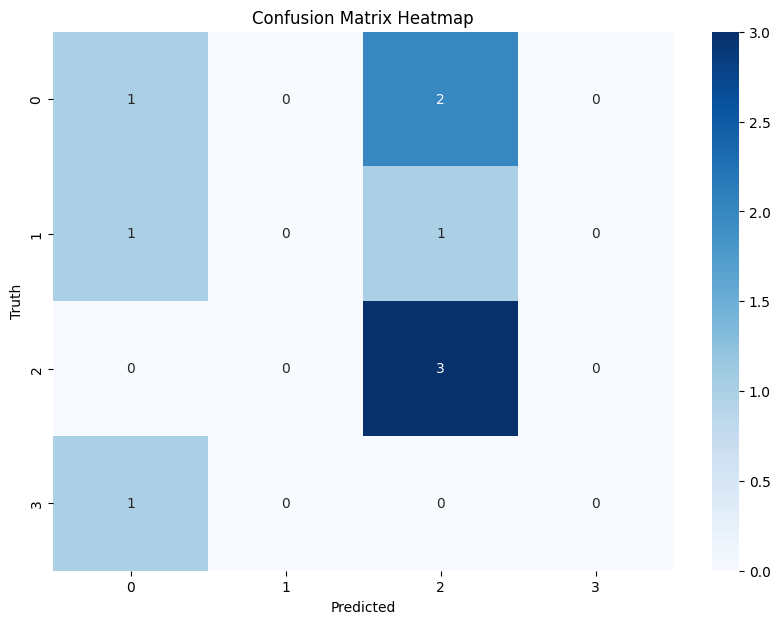

In [43]:
import seaborn as sn
import matplotlib.pyplot as plt

# Plot the confusion matrix heatmap
plt.figure(figsize=(10,7))
sn.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')  # Using 'conf_matrix' from previous code
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('Confusion Matrix Heatmap')
plt.show()

In [44]:
class_dict

{'E:\\Data\\Image_Classifier_Project\\Dataset\\croppedjerry_seinfeld': 0,
 'E:\\Data\\Image_Classifier_Project\\Dataset\\croppedkobe_bryant': 1,
 'E:\\Data\\Image_Classifier_Project\\Dataset\\croppedmuhammad_ali': 2,
 'E:\\Data\\Image_Classifier_Project\\Dataset\\croppednas': 3,
 'E:\\Data\\Image_Classifier_Project\\Dataset\\croppedsteve_jobs': 4}

# Saving the trained model

In [45]:
!pip install joblib

import joblib

# Saving the trained Logistic Regression model as a pickle file
joblib.dump(log_reg, 'saved_logistic_regression_model.pkl')

# Other objects can also be saved like confusion matrix, etc.
joblib.dump(conf_matrix, 'saved_confusion_matrix.pkl')

['saved_confusion_matrix.pkl']

# Saving class dictionary

In [46]:
import json

# Saving the dictionary as a JSON file
with open("class_dictionary.json", "w") as f:
    json.dump(class_dict, f)